In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
# Leia o arquivo CSV com o separador ';' e o encoding 'ISO-8859-1'
arquivo_csv = 'MICRODADOS_ENEM_2022.csv'
colunas_selecionadas = ['TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'TP_ENSINO',
                        'NO_MUNICIPIO_ESC', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
                        'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
                        'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TX_RESPOSTAS_CN',
                        'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TX_GABARITO_CN',
                        'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT']

# Use o parâmetro 'sep' para especificar o separador e 'encoding' para o codec de codificação
dados_enem_2022 = pd.read_csv(arquivo_csv, usecols=colunas_selecionadas, sep=';', encoding='ISO-8859-1')

# Exiba as primeiras 5 linhas do DataFrame
dados_enem_2022.head()

,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_ENSINO,NO_MUNICIPIO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,...,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT
0,M,2,1,1,NaN,NaN,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M,1,1,1,NaN,NaN,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F,2,1,1,NaN,NaN,1,1,1,1,...,498.8,565.3,DCDCEBADDABEDBCBEAEACCDDECEEBECBECAAECDDDDBCE,DBDABCADADECACBDCCEDACCCECDDABDCEADABCBCBAEAB,ABEABADCCADCAAAACDADDCECBAAACADABDEBCBCAAACEB,BDEBACECBCAEBABEDBABDACBCABCDEDEADBAABCBEACCD,DDECDBEACCAEBEAEBBCCDDCBDDACBEACEABCEABEDADBA,ECBABCDDAAECBCBECAEBAEACDEEDABBCDDEABCEDAAADB,DECDBDCEAADDBCABEDCAAADCCECEEBABEEAAABDBCCCABE...,BEEDAEABDDCEBDBAAAAACXCBCCCBCCDBDEECBDCABEECD
3,M,3,1,1,NaN,NaN,1,1,1,1,...,357.8,416.0,BACBBABBCAABCABBCBACBCBCBACABACABCBDBCBABAACA,BBCAACACDCABCBACCABABCBACBCABBBBBABCBACCBCBBA,ABACCCCBCBAADABBBACABBAABACCBCBBCDCACABABCAAC,BBBACCBABABBBBACDABBBBABCCBBCABBBBAACABBACBCB,DDCBBCCDDAADBAABEDABCEEAEBAEBECBDDEBEACCEACCD,CEDAAADBAECBCDDADEABCBECAEEDAEBABBCDECBABEACD,CDBEDACDEACAABDBDBDDCABEEECEABECABEEAAACBBEBAD...,CCCCBXCBABECBEABDDDBDECDBDCAACEECCEBDBAAAEDAE
4,M,3,1,1,NaN,NaN,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
# Use o método shape para obter o número de estudantes
total_estudantes = dados_enem_2022.shape[0]

# Exiba o número total de estudantes matriculados
print(f"Total de estudantes matriculados: {total_estudantes}")

# Filtrar os estudantes com 'TP_ST_CONCLUSAO' igual a 2
estudantes_concluindo_ensino_medio = dados_enem_2022[dados_enem_2022['TP_ST_CONCLUSAO'] == 2]

# Exibir o número de estudantes que estão cursando e concluindo o ensino médio
print(f"Total de estudantes cursando e concluindo o ensino médio em 2022: {estudantes_concluindo_ensino_medio.shape[0]}")

# Filtrar os estudantes que finalizaram os dois dias de prova (TP_PRESENCA_CN e TP_PRESENCA_CH igual a 1)
estudantes_finalizaram_provas = estudantes_concluindo_ensino_medio[
    (estudantes_concluindo_ensino_medio['TP_PRESENCA_CN'] == 1) &
    (estudantes_concluindo_ensino_medio['TP_PRESENCA_CH'] == 1)].copy()

# Exibir o número de estudantes que finalizaram os dois dias de prova
print(f"Total de estudantes que finalizaram os dois dias de prova: {estudantes_finalizaram_provas.shape[0]}")

Total de estudantes matriculados: 3476105
Total de estudantes cursando e concluindo o ensino médio em 2022: 1317560
Total de estudantes que finalizaram os dois dias de prova: 957731


In [79]:
# Lista das colunas 'TX_RESPOSTAS'
colunas_respostas = ['TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT']

# Função para contar respostas corretas
def contar_respostas_corretas(respostas_aluno, gabarito_correto):
    # Certifique-se de que ambas as strings tenham o mesmo comprimento
    min_len = min(len(respostas_aluno), len(gabarito_correto))
    
    # Compare letra a letra e conte as respostas corretas
    respostas_corretas = sum(1 for i in range(min_len) if respostas_aluno[i] == gabarito_correto[i])
    
    return respostas_corretas

# Aplicar a função para calcular o número de respostas corretas em todas as colunas 'TX_RESPOSTAS'
for coluna_respostas in colunas_respostas:
    coluna_correspondente = coluna_respostas.replace('TX_RESPOSTAS', 'TX_GABARITO')
    
    # Aplicar a função para calcular as respostas corretas e armazenar em uma nova coluna
    estudantes_finalizaram_provas[f'Respostas_Corretas_{coluna_respostas[-2:]}'] = estudantes_finalizaram_provas.apply(
        lambda row: contar_respostas_corretas(str(row[coluna_respostas]), str(row[coluna_correspondente])), axis=1)

# Exibir o DataFrame com a contagem de respostas corretas
estudantes_finalizaram_provas[['TX_RESPOSTAS_CN', 'TX_GABARITO_CN', 'Respostas_Corretas_CN',
                                              'TX_RESPOSTAS_CH', 'TX_GABARITO_CH', 'Respostas_Corretas_CH',
                                              'TX_RESPOSTAS_LC', 'TX_GABARITO_LC', 'Respostas_Corretas_LC',
                                              'TX_RESPOSTAS_MT', 'TX_GABARITO_MT', 'Respostas_Corretas_MT']]

,TX_RESPOSTAS_CN,TX_GABARITO_CN,Respostas_Corretas_CN,TX_RESPOSTAS_CH,TX_GABARITO_CH,Respostas_Corretas_CH,TX_RESPOSTAS_LC,TX_GABARITO_LC,Respostas_Corretas_LC,TX_RESPOSTAS_MT,TX_GABARITO_MT,Respostas_Corretas_MT
11,DDDDDBCDDDBDDADDDDDDDDDADDDBDDCDDDDDDDDDDEDDD,EACDDEBEACCCDABCEECBBCCAEBEDABEADBADDCBDDAAEB,10,AEAADEDEDDADDDDEDDDBDDDDADDBDDDDDDDDDEDDBBDDD,DEABEEDAEBAAECBECBABCDDAAADBCEDAEACDBBCDCBECA,16,EABAAEAAAAAAAAEAAACAAAABCABAAAAAADDDDCADAAAAA,DCBDEEDCAAEAAACABBDBEBACCBEEECCBBDCAAADCCABEDB...,12,DDDDDCDEEDDCCDDDDADCDCDDDDDBDADDDDDDDCDDDDEDD,DBAAACEBEDAECCBECDEECBDCABECBEABDDCCDBDXCBAAC,10
40,ECCCEEADACACABCADCDDBCDCCDEBCBDABBBBABADDCACB,ADBADABEABCEEEACCBDDADDCBBCCAEBAEBEBEACCCDDDE,8,CBDCADBCDDCCBDCCBADCCEBBDCCDAADBCCCBBCCEDCACC,CBECABBCDEACDCEDAAADBCDDAECBABAECBEBAEEDADEAB,13,EACBECCDDABCECCDBCDAEEDCBACBADCBBBDDBCBDDCEAC,BDECDAADCECCCDCCEBACBBAAAEECABABEECEBEEDCADBDB...,7,BEEACABCBEEECEEEAEAACDCABCDBCBBDDBAACAABCAAAE,ECDABEBDCEECDBDCCCCBCXCBAACDBAAACEBABDDEDAEBE,9
43,EADAABBECDDBABEEABBEADBCAABAAABBCDADCEBBADBCD,ADBADABEABCEEEACCBDDADDCBBCCAEBAEBEBEACCCDDDE,10,EBCCCADCDCDCCAECAAABAAEDBEAEBEEBBEDEAEDDAEBAC,CBECABBCDEACDCEDAAADBCDDAECBABAECBEBAEEDADEAB,16,ABEBECCBDEDDBBCCBCCADDBEDDDBCDDAACBABCCCCECAE,BDECDAADCECCCDCCEBACBBAAAEECABABEECEBEEDCADBDB...,6,CDBABEBDBACADBCCBADEDAC.BABDACCCCEABB*DECDCDA,ECDABEBDCEECDBDCCCCBCXCBAACDBAAACEBABDDEDAEBE,16
45,CDCBEEDEEAECEBBBDCBCBBDBBBECBBDCCDDCDACCAADDD,DDCBBCCDDAADBAABEDABCEEAEBAEBECBDDEBEACCEACCD,13,ABDAAEEABECECEBCDBABCADCAEACECDAEEDCEACDEAADB,CEDAAADBAECBCDDADEABCBECAEEDAEBABBCDECBABEACD,16,EBBEAAADCAEDBAEAABEBEACADAECBEEECADDBAABDDBCB,CDBEDACDEACAABDBDBDDCABEEECEABECABEEAAACBBEBAD...,10,EEBAAAECEECEBBABABACDDACACAEBDEECAAEBCCAEEAAB,CCCCBXCBABECBEABDDDBDECDBDCAACEECCEBDBAAAEDAE,10
49,BECBDCBBECADCDACEDAEBACEDAAAEECBCADEAACDBDDBB,ADBADABEABCEEEACCBDDADDCBBCCAEBAEBEBEACCCDDDE,9,BDCEBBDDBABADCBDEDEBEDABACBDACDEBDDCBCACCBDAB,CBECABBCDEACDCEDAAADBCDDAECBABAECBEBAEEDADEAB,9,ADDDECECECBBEDDBEADCCEEBACDDACBEEDCDBAABDCDAE,BDECDAADCECCCDCCEBACBBAAAEECABABEECEBEEDCADBDB...,10,CDBDECEBCDBADCEBDEBBBACCECBEABAEECACBDADEEBAC,ECDABEBDCEECDBDCCCCBCXCBAACDBAAACEBABDDEDAEBE,7
...,...,...,...,...,...,...,...,...,...,...,...,...
3476074,CDCCECECABDECBEECDDBDABDAACCBDDDACDCCCDADBDAE,DDCBBCCDDAADBAABEDABCEEAEBAEBECBDDEBEACCEACCD,6,BBDDADEDACAEADECABAACBBBBEBAEDBDEADABEDABAACC,CEDAAADBAECBCDDADEABCBECAEEDAEBABBCDECBABEACD,13,BCCEAAABCBBCBCEBBDAABEABCDECBECEDEDEAACECCBEA,CDBEDACDEACAABDBDBDDCABEEECEABECABEEAAACBBEBAD...,7,DDAACBAEBCEAAEEACDBBECCEADBECBDACADABCAEDECAA,CCCCBXCBABECBEABDDDBDECDBDCAACEECCEBDBAAAEDAE,10
3476086,DBAACDCEDBCEEECACBDBDCBACBDBECCCEDDCDBACDADAE,EACDDEBEACCCDABCEECBBCCAEBEDABEADBADDCBDDAAEB,9,DEABCADAEDADECEEAADBCADAAEEDABCADBCCCEADBADAE,DEABEEDAEBAAECBECBABCDDAAADBCEDAEACDBBCDCBECA,19,DBACEEABABABDAECDECDBEEECCBADDBEDDDCABEEBDCCE,DCBDEEDCAAEAAACABBDBEBACCBEEECCBBDCAAADCCABEDB...,8,BCCBDBDEEEECBBBAACADDDCABDBDBBEBDDCBDCCDBDEBA,DBAAACEBEDAECCBECDEECBDCABECBEABDDCCDBDXCBAAC,8
3476093,EDDBADBBEDAEEBECDDABABADCEBCACBDCABADBEACCBEE,DDCBBCCDDAADBAABEDABCEEAEBAEBECBDDEBEACCEACCD,6,DBDAAEDEAEABBAEAEAABEADEEEDDECBAAEEBEDACDDACD,CEDAAADBAECBCDDADEABCBECAEEDAEBABBCDECBABEACD,18,EADEECAADDEDBDAACBACACEAAACEBCEDAAEBDABADCCAA,CDBEDACDEACAABDBDBDDCABEEECEABECABEEAAACBBEBAD...,9,DBBAAAEBDCDEBBACDCEADBCAECAEDAECBDAECACEDEEAC,CCCCBXCBABECBEABDDDBDECDBDCAACEECCEBDBAAAEDAE,9
3476098,AACECDCCBECABABBABCABACCCACABCBCCCAEDCCCDADAD,EACDDEBEACCCDABCEECBBCCAEBEDABEADBADDCBDDAAEB,13,CAABECDEEBBBCEBCDADBCADAAEDECBDCACDBBAADBECAA,DEABEEDAEBAAECBECBABCDDAAADBCEDAEACDBBCDCBECA,18,DDBCBEAAAEEBBDEABBCBAAAECCBCCBAABDABACABBDBED,DCBDEEDCAAEAAACABBDBEBACCBEEECCBBDCAAADCCABEDB...,17,ACBADCCCECACCCCDCCCCBEDCBDABCECBDDCABCAEABAEA,DBAAACEBEDAECCBECDEECBDCABECBEABDDCCDBDXCBAAC,16


In [80]:
def grafico(nota, resposta):
    # Filtrar apenas os estudantes que finalizaram os dois dias de prova e possuem notas em matemática
    estudantes_finalizaram_e_nota_mt = estudantes_finalizaram_provas[estudantes_finalizaram_provas[nota].notna()]

    # Filtrar estudantes com notas de Matemática diferentes de zero
    estudantes_finalizaram_e_nota_mt = estudantes_finalizaram_e_nota_mt.query(f'{nota} != 0')

        # Dados para o gráfico
    acertos_mt = estudantes_finalizaram_e_nota_mt[resposta]
    nota_mt = estudantes_finalizaram_e_nota_mt[nota]

        # Calcular a nota média para cada quantidade de acertos em Matemática
    nota_media_por_acertos = estudantes_finalizaram_e_nota_mt.groupby(resposta)[nota].mean()

        # Plotar o gráfico de dispersão
    plt.figure(figsize=(10, 6))
    plt.scatter(acertos_mt, nota_mt, alpha=0.5)
    plt.title(f'Relação entre Acertos em {nota[-2:]} e Nota em {nota[-2:]}')
    plt.xlabel(f'Acertos em {nota[-2:]}')
    plt.ylabel(f'Nota em {nota[-2:]}')
    plt.grid(True)

        # Destacar a nota média no gráfico
    plt.plot(nota_media_por_acertos.index, nota_media_por_acertos.values, color='red', marker='o', linestyle='-', markersize=5, label='Nota Média por Acertos')
    plt.legend()

        # Exibir o gráfico
    plt.show()

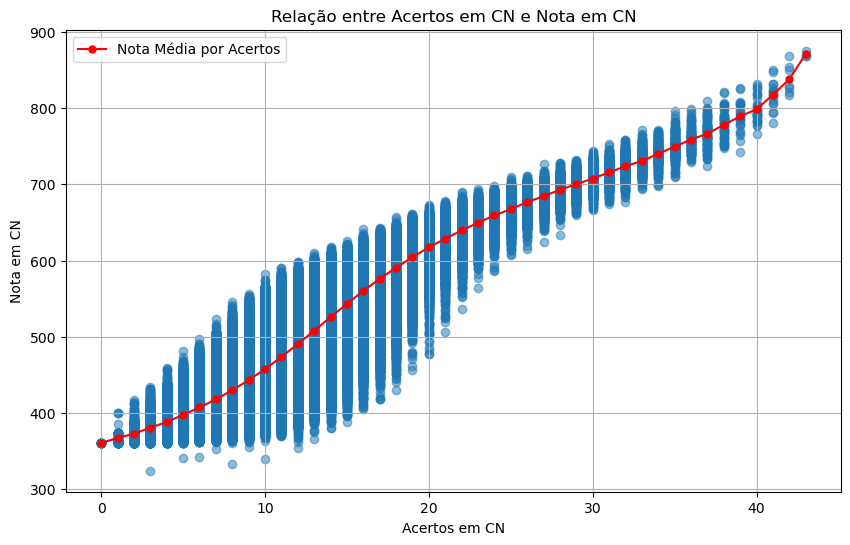

In [81]:
grafico('NU_NOTA_CN','Respostas_Corretas_CN')

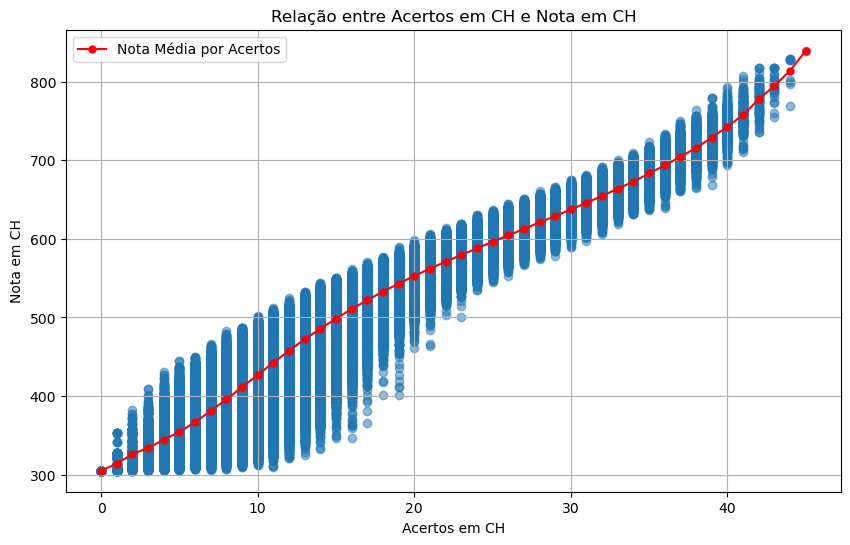

In [82]:
grafico('NU_NOTA_CH','Respostas_Corretas_CH')

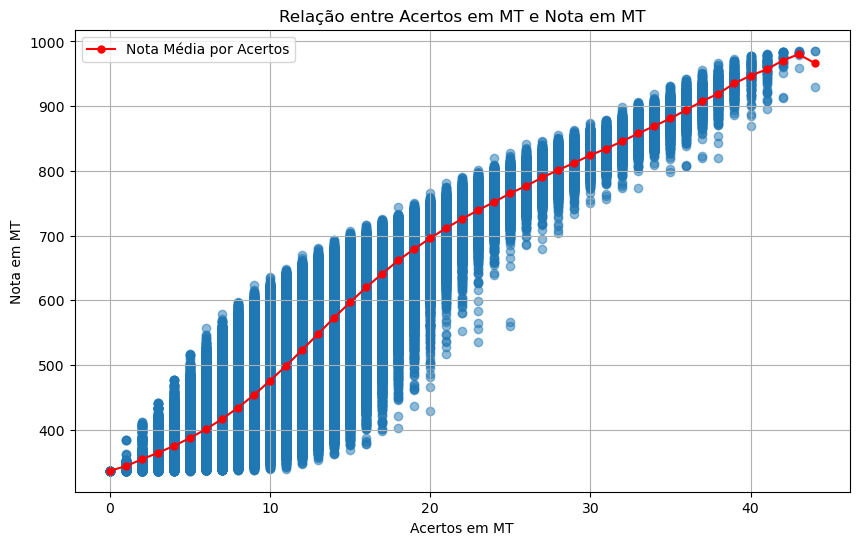

In [83]:
grafico('NU_NOTA_MT','Respostas_Corretas_MT')

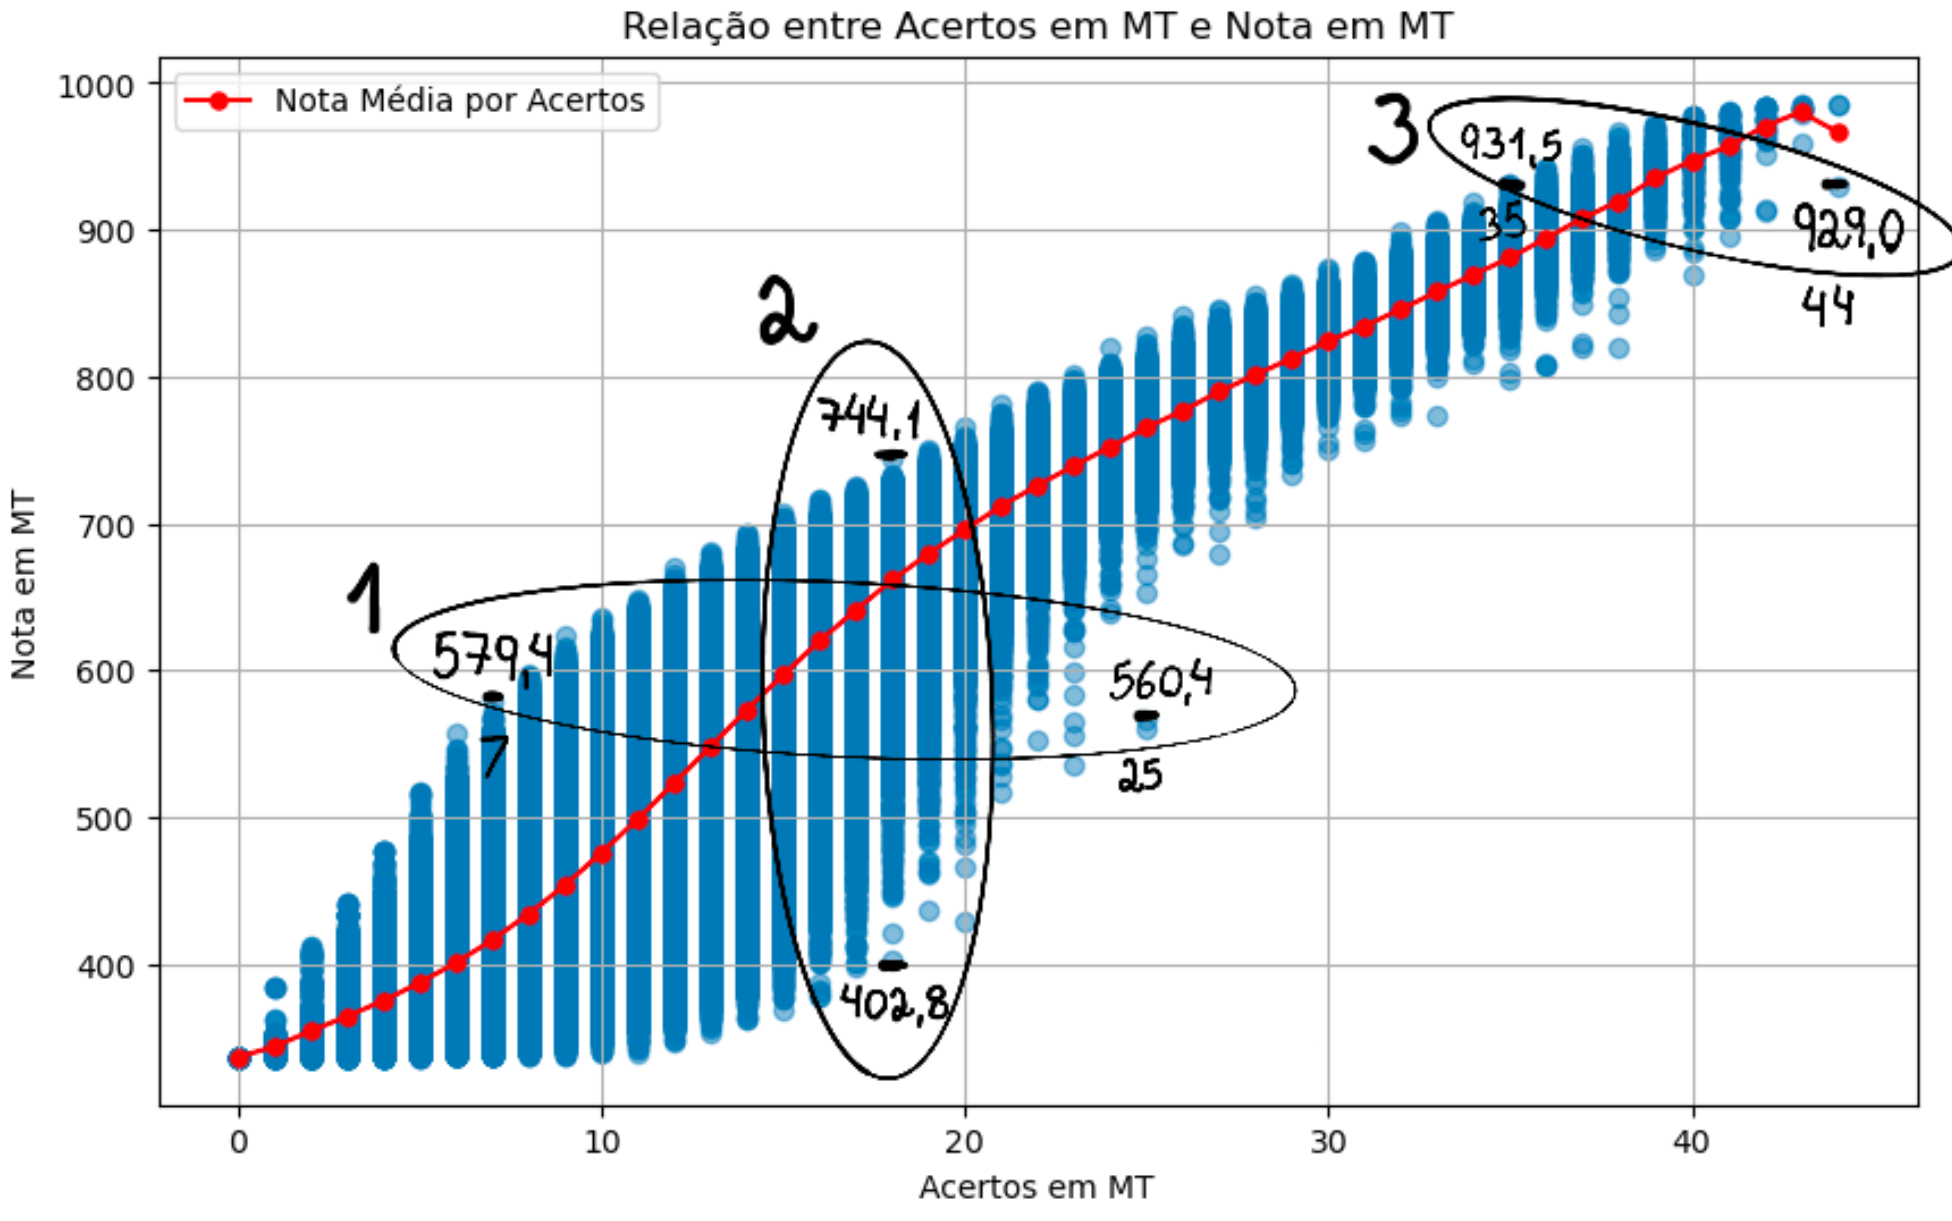

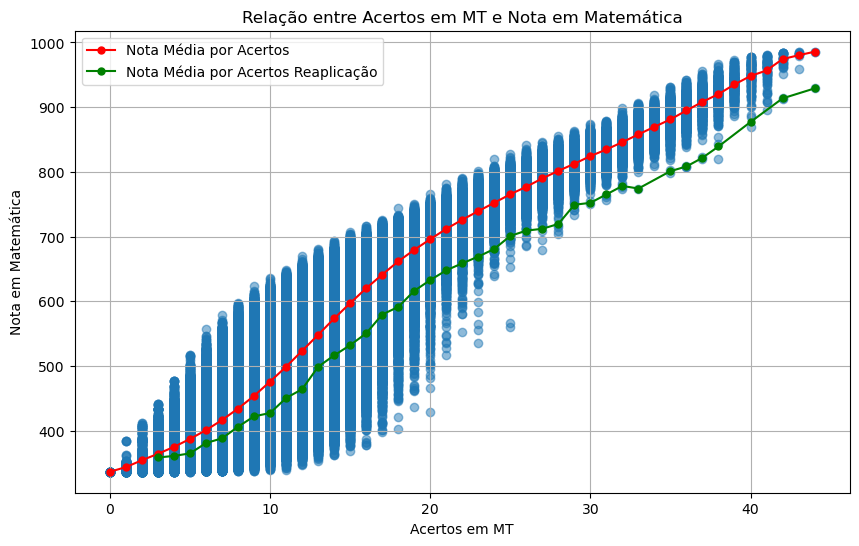

In [53]:
# Filtrar apenas os estudantes que finalizaram os dois dias de prova e possuem notas em matemática
estudantes_finalizaram_e_nota_mt = estudantes_finalizaram_provas[estudantes_finalizaram_provas['NU_NOTA_MT'].notna()]

# Filtrar estudantes com notas de Matemática diferentes de zero
estudantes_finalizaram_e_nota_mt = estudantes_finalizaram_e_nota_mt.query('NU_NOTA_MT != 0')

# Dados para o gráfico
acertos_mt = estudantes_finalizaram_e_nota_mt['Respostas_Corretas_MT']
nota_mt = estudantes_finalizaram_e_nota_mt['NU_NOTA_MT']

# Calcular a nota média para cada quantidade de acertos em Matemática
grupo1 = estudantes_finalizaram_e_nota_mt[
    (estudantes_finalizaram_e_nota_mt['CO_PROVA_MT'] == 1075) |
    (estudantes_finalizaram_e_nota_mt['CO_PROVA_MT'] == 1076) |
    (estudantes_finalizaram_e_nota_mt['CO_PROVA_MT'] == 1077) |
    (estudantes_finalizaram_e_nota_mt['CO_PROVA_MT'] == 1078)].copy()

nota_media_por_acertos1 = grupo1.groupby('Respostas_Corretas_MT')['NU_NOTA_MT'].mean()

grupo2 = estudantes_finalizaram_e_nota_mt = estudantes_finalizaram_e_nota_mt[
    (estudantes_finalizaram_e_nota_mt['CO_PROVA_MT'] == 1155) |
    (estudantes_finalizaram_e_nota_mt['CO_PROVA_MT'] == 1156) |
    (estudantes_finalizaram_e_nota_mt['CO_PROVA_MT'] == 1157) |
    (estudantes_finalizaram_e_nota_mt['CO_PROVA_MT'] == 1158)].copy()

nota_media_por_acertos2 = grupo2.groupby('Respostas_Corretas_MT')['NU_NOTA_MT'].mean()

# Plotar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(acertos_mt, nota_mt, alpha=0.5)
plt.title('Relação entre Acertos em MT e Nota em Matemática')
plt.xlabel('Acertos em MT')
plt.ylabel('Nota em Matemática')
plt.grid(True)

# Destacar a nota média no gráfico
plt.plot(nota_media_por_acertos1.index, nota_media_por_acertos1.values, color='red', marker='o', linestyle='-', markersize=5, label='Nota Média por Acertos')
plt.legend()

# Destacar a nota média no gráfico
plt.plot(nota_media_por_acertos2.index, nota_media_por_acertos2.values, color='green', marker='o', linestyle='-', markersize=5, label='Nota Média por Acertos Reaplicação')
plt.legend()

# Exibir o gráfico
plt.show()

In [56]:
len(grupo2)

509